# ResNet50

* ResNet50 is a 50-layer-deep model that performs well on the **Imagenet dataset**, a huge dataset of more than 14 million images. 
* **ResNet50** can ditinguish between 1000 different classes.
* This model would take too long to train on a regular computer, but Keras makes it easy for us to use it, we just need to prepare the image we want to classify for the model, predict the processed image, and decode the predictions.

<img src='data/resnet50_burger.png' width="600" height="300" align="center"/>

* **To use pre-trained models to classify images, we first have to adapt these images so that they can be understood by the model.**

### Pre-processing images for ResNet50
* To prepare images for ResNet50, we would do the following:
    * First, import `image` from `keras.preprocessing` and `preprocess_input` from `keras.applications.resnet50`
    * Next, load the image with **`load_img`**, providing the target size (for this particular model that is 224x224).
    * We turn the image into a numpy array with `img_to_array`
    * We expand the dimensions of the array and preprocess the input in the same way that the training images were preprocessed
    * We import ResNet50 and `decode_predictions`, load the model with Imagnet pre-trained weights, predict on our image, and decode the predictions
    * That is, getting the predicted classes with the highest probabilities
    
* Inside a CNN we can check how the different filtersactivate in response to an input image: 

<img src='data/burger_layers.png' width="800" height="400" align="center"/>

In [8]:
import numpy as np
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import matplotlib.pyplot as plt

### Preparing your input image
The original ResNet50 model was trained with images of size 224 x 224 pixels and a number of preprocessing operations; like the subtraction of the mean pixel value in the training set for all training images. You need to pre-process the images you want to predict on in the same way.

When predicting on a single image you need it to fit the model's input shape, which in this case looks like this: (batch-size, width, height, channels), `np.expand_dims` with parameter `axis = 0` adds the batch-size dimension, representing that a single image will be passed to predict. This batch-size dimension value is 1, since we are only predicting on one image.

You will go over these preprocessing steps as you prepare this dog's (named Ivy) image into one that can be classified by ResNet50.

In [2]:
# Load the image with the right target size for your model
img = image.load_img('data/ivy.png', target_size=(224, 224))

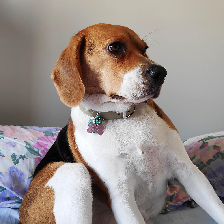

In [3]:
img

In [4]:
# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image, this is so that it fits the expected model input format
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = preprocess_input(img_expanded)

Alright! Ivy is now ready for ResNet50. Do you know this dog's breed? Let's see what this model thinks it is!

#### Exercises: Using a real world model 
**ResNet50** is a model trained on the **Imagenet dataset** that is able to distinguish between 1000 different labeled objects. **ResNet50** is a deep model with 50 layers, you can check it in 3D [here](https://tensorspace.org/html/playground/resnet50.html). It's time to use this trained model to find out Ivy's breed!

It's time to use this trained model to find out Ivy's breed!

In [5]:
# Instantiate a ResNet50 model with 'imagenet' weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on your already processed img
preds = model.predict(img_ready)

# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

2022-01-19 11:23:03.012176: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 11:23:03.012377: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-19 11:23:04.114471: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Predicted: [('n02088364', 'beagle', 0.9073764), ('n02089867', 'Walker_hound', 0.06626675), ('n02089973', 'English_foxhound', 0.018850882)]


In [6]:
# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02088364', 'beagle', 0.9073764), ('n02089867', 'Walker_hound', 0.06626675), ('n02089973', 'English_foxhound', 0.018850882)]


### Custom dog image
Let's try it out with a picture of my own pup and see how ResNet50 does!

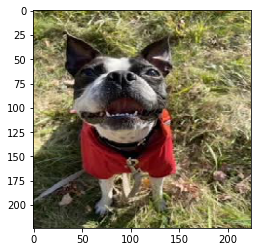

In [9]:
img = image.load_img('data/0.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_expanded = np.expand_dims(img_array, axis=0)
img_ready = preprocess_input(img_expanded)
plt.imshow(img)

In [10]:
preds = model.predict(img_ready)

In [11]:
# Decode the first 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02096585', 'Boston_bull', 0.93337643), ('n02108915', 'French_bulldog', 0.033587787), ('n02112706', 'Brabancon_griffon', 0.01378544)]


ResNet50 predicted with **93% certainty** that my little girl is a **Boston Bull (Boston Terrier)**! ResNet50 is **correct**!